# Task 2 – Customer Segmentation

**Objective:**  
Use clustering (K-Means) to group mall customers based on annual income and spending score.  

**Steps:**  
1. Load and explore dataset  
2. Visualize data distributions  
3. Apply K-Means clustering  
4. Determine optimal number of clusters (Elbow method)  
5. Visualize clusters in 2D  
6. (Bonus) Try DBSCAN clustering and compare


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("Mall_Customers.csv")

print("Shape:", df.shape)
df.head()


Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


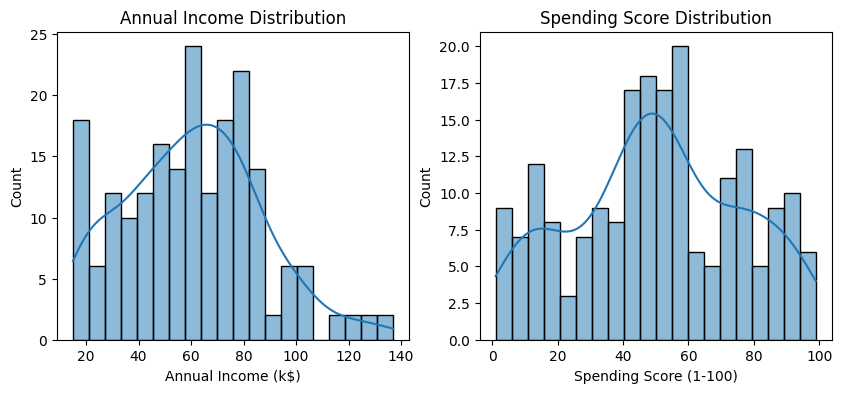

In [3]:
df.info()
df.describe()

# Check missing values
df.isnull().sum()

# Distribution plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()


In [4]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


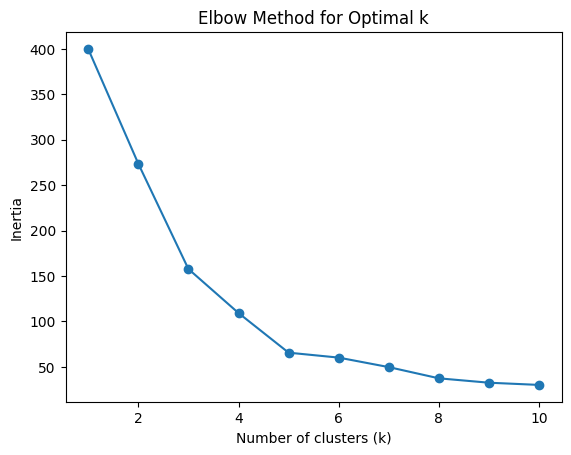

In [5]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [6]:
k = 5  # adjust based on elbow method result
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


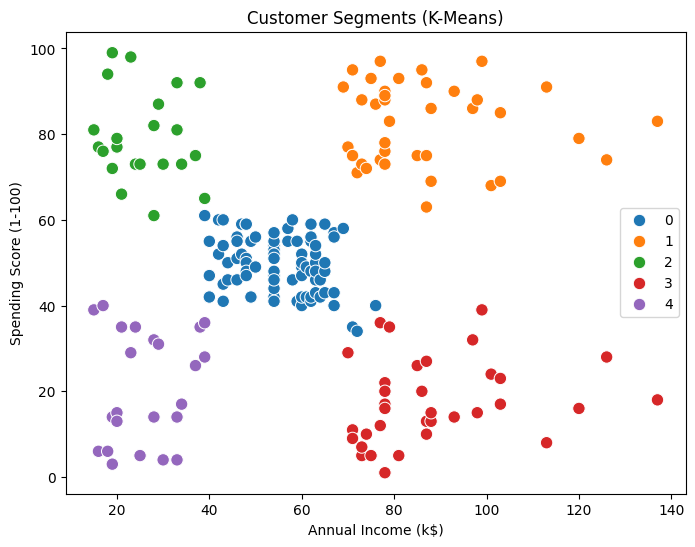

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=df,
    s=80
)
plt.title("Customer Segments (K-Means)")
plt.legend()
plt.show()


In [8]:
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


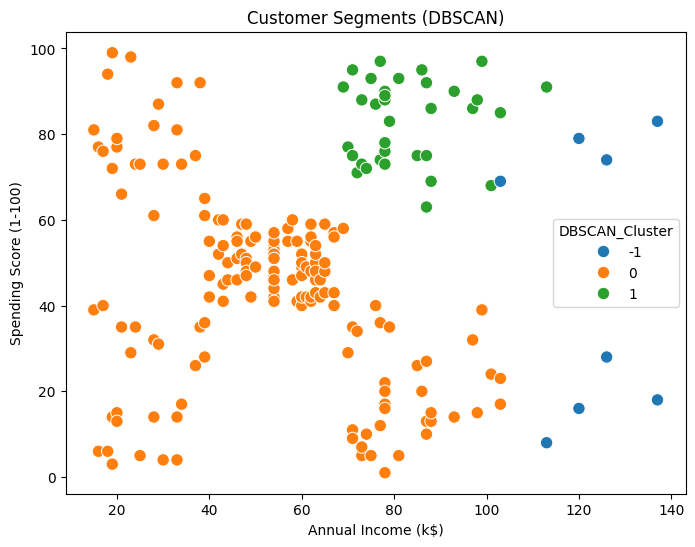

In [9]:
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = db_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="DBSCAN_Cluster",
    palette="tab10",
    data=df,
    s=80
)
plt.title("Customer Segments (DBSCAN)")
plt.show()
